In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import clear_output
from scipy.signal import savgol_filter



In [2]:
agentnorm_path = 'checkpointGPU_1000_normal2.pt'

agenthumexp05_path = 'checkpointGPU_1000_humExp_05.pt'
agenthumexp10_path = 'checkpointGPU_1000_humExp_10.pt'
agenthumexp15_path = 'checkpointGPU_1000_humExp_15.pt'
agenthumexp20_path = 'checkpointGPU_1000_humExp_20.pt'

In [3]:
def sliding_average(a, window_size):
    """one-liner for sliding average for array a with window size window_size"""
    return np.convolve(np.concatenate([np.ones((window_size - 1)) * a[0], a]), np.ones((window_size))/window_size, mode='valid')

def plot_data(means_window = 100):
    plt.figure(figsize=(15,15))
    clear_output(wait=True)    
    plt.title('Training...')

    plt.subplot(2,2,1)
    plt.xlabel('training iteration')
    plt.ylabel('epsilon')
    plt.plot(np.arange(len(eps_data)), eps_data, label='eps')

    plt.subplot(2,2,2)
    plt.xlabel('step')
    plt.ylabel('second')
    plt.plot(np.arange(len(timestep_data)), timestep_data, label='time')

    plt.subplot(2,2,3)
    plt.xlabel('episode')
    plt.ylabel('reward')
    #plt.plot(scores_data, label='rewards')
    plt.plot(np.arange(len(scores_data)), scores_data, sliding_average(scores_data, means_window), label="avg_rew")

    plt.subplot(2,2,4)
    plt.xlabel('training iteration')
    plt.ylabel('loss')
    plt.plot(np.arange(len(loss_data)), loss_data, label='loss')
    
    plt.show()

In [4]:
agent_norm = torch.load('RealTimePlay/agentEXP/' + agentnorm_path, map_location=torch.device('cpu'))
agent_humexp = torch.load('RealTimePlay/agentEXP/' + agenthumexp20_path, map_location=torch.device('cpu'))

scores_data_norm = agent_norm['scores_data']
timestep_data_norm = agent_norm['timestep_data']
step_for_episode_data_norm = agent_norm['step_for_episode_data']
loss_data_norm = agent_norm['loss_data']

scores_data_humexp = agent_humexp['scores_data']
timestep_data_humexp = agent_humexp['timestep_data']
step_for_episode_data_humexp = agent_humexp['step_for_episode_data']
loss_data_humexp = agent_humexp['loss_data']

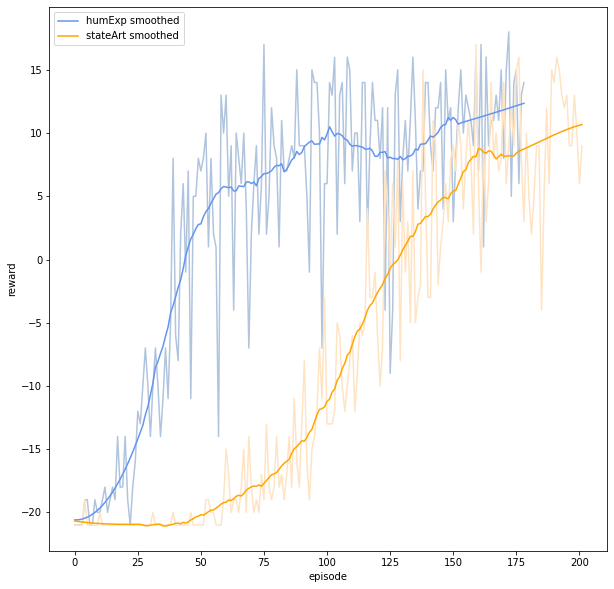

In [5]:
plt.figure(figsize=(10,10))

hum_exp_smoot = savgol_filter(scores_data_humexp, 51, 3)
norm_smoot = savgol_filter(scores_data_norm, 51, 3)
plt.xlabel('episode')
plt.ylabel('reward')
plt.plot(scores_data_humexp, color = 'lightsteelblue')
plt.plot(scores_data_norm, color = 'bisque')
plt.plot(hum_exp_smoot, color = 'cornflowerblue', label='humExp smoothed')
plt.plot(norm_smoot, color = 'orange', label='stateArt smoothed')
plt.legend()


In [6]:
eps_win_norm = []
eps_lost_norm = []

for ep in range(len(scores_data_norm)):
    if scores_data_norm[ep] > 0:
        eps_win_norm.append(step_for_episode_data_norm[ep])
    else:
        eps_lost_norm.append(step_for_episode_data_norm[ep])

print('Ep Won Norm:', len(eps_win_norm))
print('Ep Lost Norm:', len(eps_lost_norm))

Ep Won Norm: 68
Ep Lost Norm: 134


In [7]:
eps_win_humexp = []
eps_lost_humexp = []

for ep in range(len(scores_data_humexp)):
    if scores_data_humexp[ep] > 0:
        eps_win_humexp.append(step_for_episode_data_humexp[ep])
    else:
        eps_lost_humexp.append(step_for_episode_data_humexp[ep])

print('Ep Won HumExp:', len(eps_win_humexp))
print('Ep Lost HumExp:', len(eps_lost_humexp))

Ep Won HumExp: 128
Ep Lost HumExp: 51


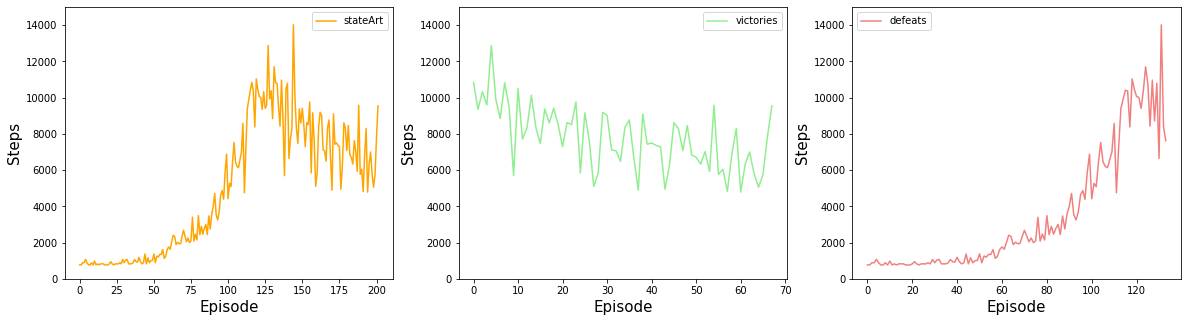

In [10]:
lbl_sz = 15

plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.xlabel('Episode', fontsize= lbl_sz)
plt.ylabel('Steps', fontsize=lbl_sz)
plt.ylim(0, 15000)
plt.plot(step_for_episode_data_norm, color='orange', label='stateArt')
plt.legend()


plt.subplot(132)
plt.xlabel('Episode', fontsize= lbl_sz)
plt.ylabel('Steps', fontsize= lbl_sz)
plt.ylim(0, 15000)
plt.plot(eps_win_norm, color='lightgreen', label='victories')
plt.legend()


plt.subplot(133)
plt.xlabel('Episode', fontsize= lbl_sz)
plt.ylabel('Steps', fontsize= lbl_sz)
plt.ylim(0, 15000)
plt.plot(eps_lost_norm, color='lightcoral', label='defeats')
plt.legend()


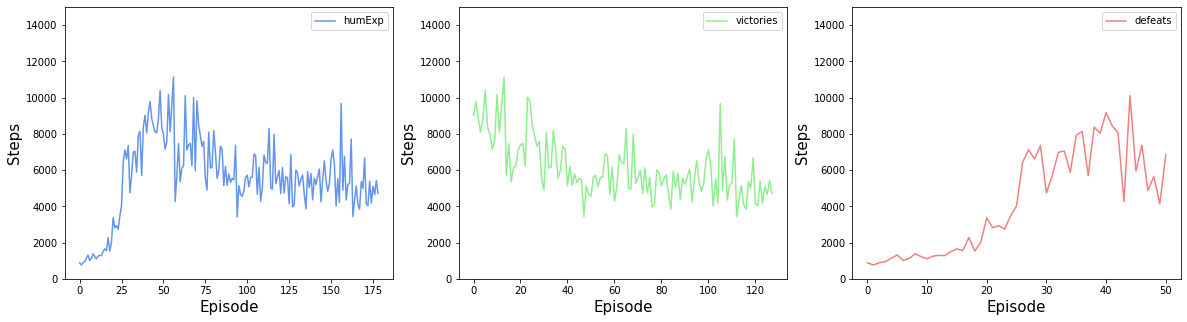

In [14]:
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.xlabel('Episode', fontsize= lbl_sz)
plt.ylabel('Steps', fontsize= lbl_sz)
plt.ylim(0, 15000)
plt.plot(step_for_episode_data_humexp, color='cornflowerblue', label='humExp')
plt.legend()


plt.subplot(132)
plt.xlabel('Episode', fontsize= lbl_sz)
plt.ylabel('Steps', fontsize= lbl_sz)
plt.ylim(0, 15000)
plt.plot(eps_win_humexp, color='lightgreen', label='victories')
plt.legend()

plt.subplot(133)
plt.xlabel('Episode', fontsize= lbl_sz)
plt.ylabel('Steps', fontsize= lbl_sz)
plt.ylim(0, 15000)
plt.plot(eps_lost_humexp, color='lightcoral', label='defeats')
plt.legend()



In [ ]:
agent_humexp5 = torch.load('RealTimePlay/agentEXP/' + agenthumexp05_path, map_location=torch.device('cpu'))
agent_humexp10 = torch.load('RealTimePlay/agentEXP/' + agenthumexp10_path, map_location=torch.device('cpu'))
agent_humexp15 = torch.load('RealTimePlay/agentEXP/' + agenthumexp15_path, map_location=torch.device('cpu'))
agent_humexp20 = torch.load('RealTimePlay/agentEXP/' + agenthumexp20_path, map_location=torch.device('cpu'))


scores_data_agent_humexp5 = agent_humexp5['scores_data']
scores_data_agent_humexp10 = agent_humexp10['scores_data']
scores_data_agent_humexp15 = agent_humexp15['scores_data']
scores_data_agent_humexp20 = agent_humexp20['scores_data']


In [ ]:
scores_data = scores_data_agent_humexp20
plt.figure(figsize=(10,10))
means_window = 100

plt.xlabel('episode')
plt.ylabel('reward')
plt.ylim(-22, 22)
plt.axhline(y=0, color ="grey", linestyle ="--")
plt.plot(np.arange(len(scores_data)), scores_data)#, sliding_average(scores_data_agent_humexp5, means_window))
plt.plot(np.arange(len(scores_data)),sliding_average(scores_data, means_window), label="avg_rew")





plt.legend()

In [ ]:
plt.figure(figsize=(10,10))

scores_data_agent_humexp5_smooth = savgol_filter(scores_data_agent_humexp5, 51, 3)
scores_data_agent_humexp10_smooth = savgol_filter(scores_data_agent_humexp10, 51, 3)
scores_data_agent_humexp15_smooth = savgol_filter(scores_data_agent_humexp15, 51, 3)
scores_data_agent_humexp20_smooth = savgol_filter(scores_data_agent_humexp20, 51, 3)

plt.xlabel('episode')
plt.ylabel('reward')

plt.plot(scores_data_agent_humexp5_smooth, label='DDQL05 smoothed')
plt.plot(scores_data_agent_humexp10_smooth, label='DDQL10 smoothed')
plt.plot(scores_data_agent_humexp15_smooth, label='DDQL15 smoothed')
plt.plot(scores_data_agent_humexp20_smooth, label='DDQL20 smoothed')
plt.axhline(y=0, color ="grey", linestyle ="--")


plt.legend()

In [ ]:
ddql = [-8, -12, -16, -16, -15, -17, -14, -12, -12, -14]
p1 = [-11, -7, -8, -4, 3, -3, 1, 9, 5, 1]
p2 = [-10, 1, -3, -15, -10, -14, -11, -5, -3, -10]
p3 = [8, 9, -1, 8, 1, 9, 6, 8, 7, 12]

In [ ]:
plt.figure(figsize=(10,10))


plt.boxplot([ddql,p1,p2,p3], labels = ['DDQL', 'Hum1', 'Hum2', 'Hum3'])
plt.show()

In [ ]:
p1 = [11, 6, 15, 8, 12, 10, 7, 13, 12, 11]
p2 = [17, 20, 20, 20, 18, 19, 21, 19, 20, 21]
p3 = [8, 9, -1, 8, 1, 9, 6, 8, 7, 12]

In [ ]:
plt.figure(figsize=(10,10))


plt.boxplot([p3,p1,p2], labels = ['Hum3', 'Hum3_3ep', 'Hum3_6ep'])
plt.show()